Introduction to the Anaemic or Not Dataset

The Anaemic or Not dataset is a medical dataset designed to study and predict the presence of anemia, a condition characterized by a deficiency of healthy red blood cells or hemoglobin in the blood. This dataset contains clinical and physiological parameters collected from individuals, which help determine whether a person is anaemic or not. It serves as a valuable resource for healthcare analytics and machine learning applications focused on disease prediction, early diagnosis, and health risk assessment.

The dataset typically includes patient-related information such as age, gender, hemoglobin level, red blood cell count, iron concentration, and other relevant blood test results. By analyzing these features, data scientists and healthcare professionals can identify the most influential factors contributing to anemia and develop predictive models that can automatically classify patients as anaemic or non-anaemic.

This dataset plays an important role in promoting data-driven healthcare solutions by assisting doctors and researchers in recognizing early signs of anemia, especially in vulnerable populations such as children and pregnant women. Through machine learning techniques, insights gained from this dataset can help design preventive measures, improve diagnosis accuracy, and enhance public health awareness. Overall, the Anaemic or Not dataset provides a strong foundation for developing intelligent systems aimed at improving health monitoring and medical decision-making.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df=pd.read_csv(r"C:\datascience\project\machine leaaring 5\output.csv")
print("first 5 row",df.head())

first 5 row    Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3     Yes
1       2   F     45.6033       28.1900      26.2067  13.5      No
2       3  F      45.0107       28.9677      26.0215  11.7      No
3       4   F     44.5398       28.9899      26.4703  13.5      No
4       5  M      43.2870       30.6972      26.0158  12.4      No


In [3]:
#data cleaning
df.isna().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [4]:
df['Anaemic'] = df['Anaemic'].map({'Yes': 1, 'No': 0})
df

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,1
1,2,F,45.6033,28.1900,26.2067,13.5,0
2,3,F,45.0107,28.9677,26.0215,11.7,0
3,4,F,44.5398,28.9899,26.4703,13.5,0
4,5,M,43.2870,30.6972,26.0158,12.4,0
...,...,...,...,...,...,...,...
99,100,F,49.9999,29.2860,20.7141,14.5,1
100,101,M,42.2324,30.6757,27.0919,6.3,1
101,102,F,45.6064,31.9084,22.4852,12.7,0
102,103,M,45.2095,29.2769,25.5136,13.4,0


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Number'),
  Text(1, 0, '%Red Pixel'),
  Text(2, 0, '%Green pixel'),
  Text(3, 0, '%Blue pixel'),
  Text(4, 0, 'Hb'),
  Text(5, 0, 'Anaemic')])

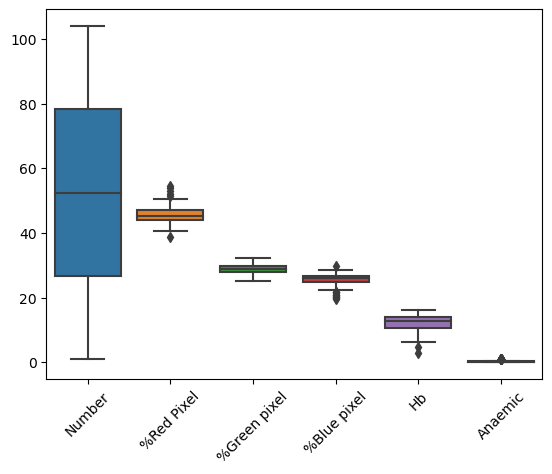

In [5]:
sns.boxplot(df)
plt.xticks(rotation=45)

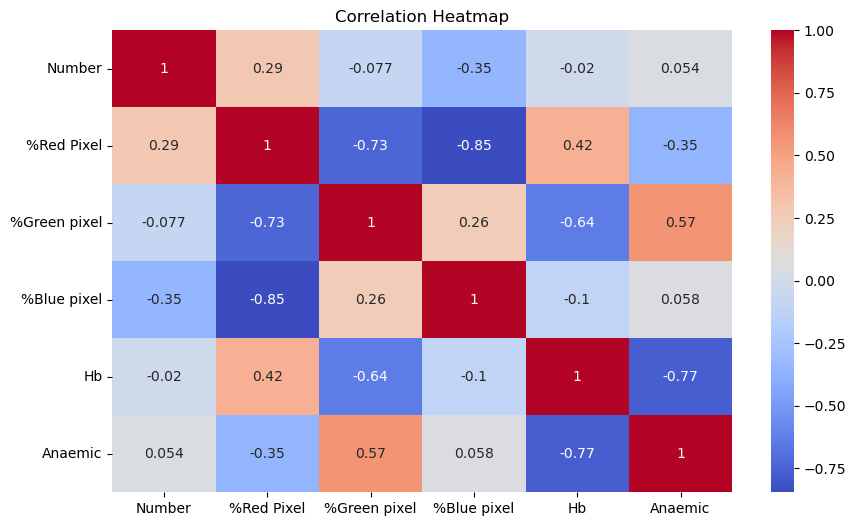

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [7]:
x=df[['Number','%Red Pixel','%Green pixel','%Blue pixel','Hb']]
y=df[['Anaemic']]

In [8]:
# splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter= 1000)
# fitting model with data
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

c:\Users\ruksana\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#Evaluating the Algorithm
from sklearn import metrics
print(metrics.mean_absolute_error)
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred) ))
print("Accuracy:", metrics. accuracy_score(y_test, y_pred))

<function mean_absolute_error at 0x0000024AE5B17250>
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Accuracy: 1.0
